In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath('../src'))

from data.load_data import load_excel_data

file_path = '../data/raw/dataset original.xlsx'
df = load_excel_data(file_path)
df.head()

,bulan,tahun,jumlah
0,january,2006,1005200
1,february,2006,723717
2,march,2006,863592
3,april,2006,867901
4,may,2006,864382


In [3]:
# 4. Info umum
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bulan   216 non-null    object
 1   tahun   216 non-null    int64 
 2   jumlah  216 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ KB


,tahun,jumlah
count,216.000000,2.160000e+02
mean,2014.500000,1.373133e+06
std,5.200179,4.212739e+05
min,2006.000000,2.750000e+04
25%,2010.000000,1.068236e+06
50%,2014.500000,1.478702e+06
75%,2019.000000,1.698560e+06
max,2023.000000,2.132360e+06


In [4]:
# 5. Cek missing values
print(df.isnull().sum())

bulan     0
tahun     0
jumlah    0
dtype: int64


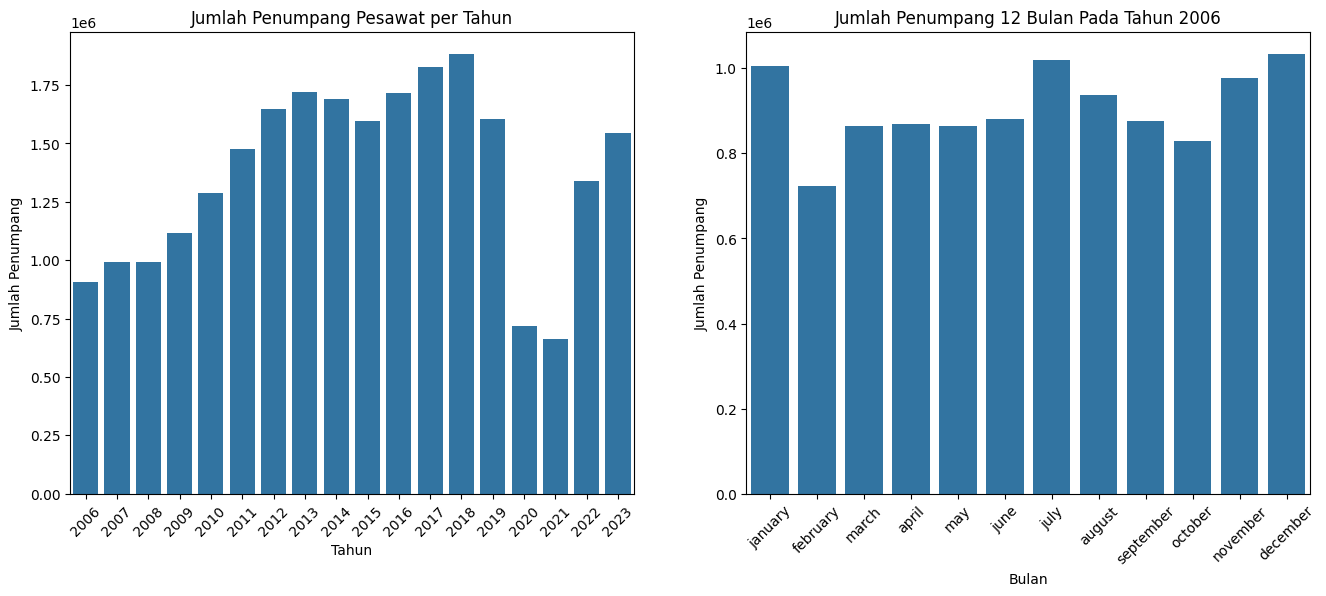

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plt.figure(figsize=(12, 6))
sns.barplot(ax=axes[0], x='tahun', y='jumlah', data=df, errorbar=None)
axes[0].set_title('Jumlah Penumpang Pesawat per Tahun')
axes[0].set_xlabel('Tahun')
axes[0].set_ylabel('Jumlah Penumpang')
axes[0].tick_params(axis='x', rotation=45)

plt.figure(figsize=(12, 6))
sns.barplot(ax=axes[1], x='bulan', y='jumlah', data=df.head(12), errorbar=None)
axes[1].set_title('Jumlah Penumpang 12 Bulan Pada Tahun 2006')
axes[1].set_xlabel('Bulan')
axes[1].set_ylabel('Jumlah Penumpang')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

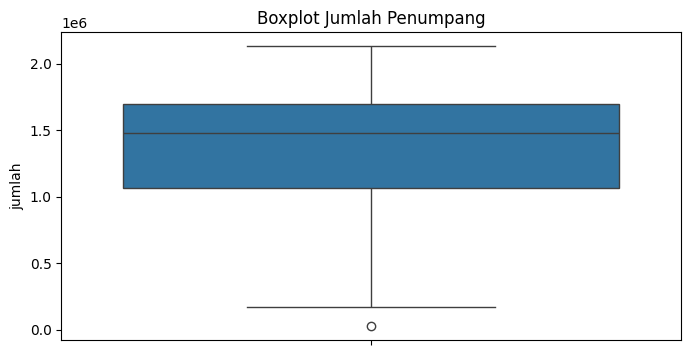

In [6]:
plt.figure(figsize=(8, 4))
sns.boxplot(y=df['jumlah'])
plt.title('Boxplot Jumlah Penumpang')
plt.show()

In [7]:
Q1 = df['jumlah'].quantile(0.25)
Q3 = df['jumlah'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['jumlah'] < Q1 - 1.5 * IQR) | (df['jumlah'] > Q3 + 1.5 * IQR)]
print(outliers)

    bulan  tahun  jumlah
172   may   2020   27500


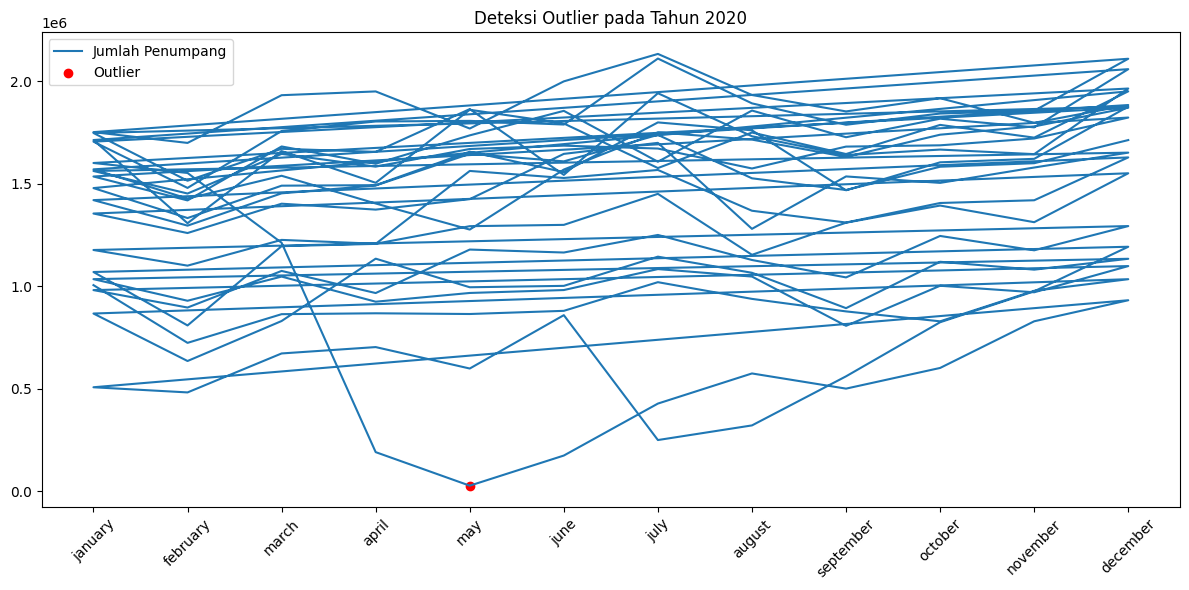

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['bulan'], df['jumlah'], label='Jumlah Penumpang')
plt.scatter(outliers['bulan'], outliers['jumlah'], color='red', label='Outlier')
plt.legend()
plt.title('Deteksi Outlier pada Tahun 2020')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()